# Лабораторная работа №2
### Решение краевых задач методом разностных аппроксимаций

Разобъем отрезок [a,b] на n одинаковых частей с шагом $$h = {b - a \over n} $$
n будем брать разные, чтобы показать, как зависит решение от выбранного числа n. 
У нас уравнение в общем случае:
$$a*y" + (1 + b*x^2)*y = -1 $$   $$  -1 ≤ x ≤ 1 $$ $$ y(-1) = 0, y(1) = 0$$
Заменим *y"* на $$ y_{k+1}-2*y_{k}+y_{k-1} \over h^2 $$
Получаем $$ a*{y_{k+1}-2*y_{k}+y_{k-1} \over h^2} + (1 + b*x^2)*y = -1 $$
$$ k = 1, n - 1 $$
Дальше приведя подобные слогаемые и домножая на $$h^2$$ получаем:
$$ a*y_{k - 1} -(2*a - h^2*(1 + b*x^2))*y_{k} + a*y_{k + 1} = -h^2 $$
Таким образом у нас получилась трехдиагональная система линейных уравнений, которую можно решить методом прогонки или встроенными средствами программ.

Разделим коэффициенты для универсальности на отдельные функции. Пусть при $$ y_{ k - 1 } $$ стоит условно А, при $$y_{k}$$ стоит B, а при $$y_{k+1}$$ стоит C, изначальный коэффициент при y будет p(x)

In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import warnings


def p(x, betta):
    return 1 + betta * x**2


def f(x):
    return -1


def A(x, alfa):
    return 1 * alfa


def B(x, h, alfa, betta):
    return -2 * alfa + h*h * p(x, betta)


def C(x, alfa):
    return 1 * alfa


def F(x, h):
    return h*h*f(x)

a = -1
b = 1
n = [5, 10, 50, 100, 500]
k = 26

Теперь составим универсальную функцию для решения поставленной задачи, зависящая только от *alfa* и *betta* и от m - количества частей разбиения

In [14]:
def solve(m, alfa, betta):
    h = (b - a) / m
    x = a + h
    x_k = []
    y = []
    y.append(0)
    x_k.append(a)
    matrix = []
    for j in range(1, m):
        row = []
        for k in range(1, m):
            if (k == j - 1):
                row.append(A(x, alfa(x)))
            elif (k == j):
                row.append(B(x, h, alfa(x), betta(x)))
            elif (k == j + 1):
                row.append(C(x, alfa(x)))
            else:
                row.append(0)
        matrix.append(row)
        x_k.append(x)
        x += h
    x_k.append(x)
    x = a
    ans_vect = []
    x += h
    for j in range( m - 1):
        ans_vect.append(F(x, h))
        x += h
    y_t = np.linalg.solve(matrix, ans_vect)
    for j in y_t:
        y.append(j)
    y.append(0)
    return (x_k, y)

Теперь можно посчитать результаты для конкретных уравнений:

### Задание 1.
Решить уравнение $$y" + (1 + x^2)*y = -1 $$ 
Т.е. *alfa = 1* и *betta = 1*
Вызовем нашу универсальную функцию:

Для n = 5 , точность не достигается
Для n = 10 , точность не достигается


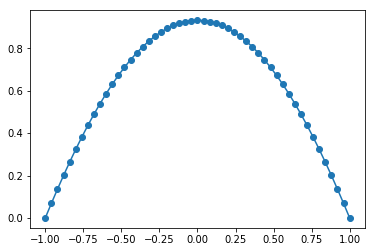

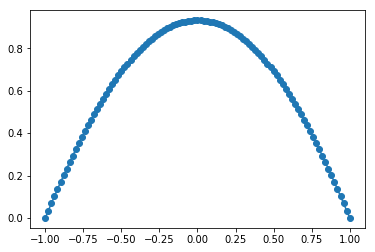

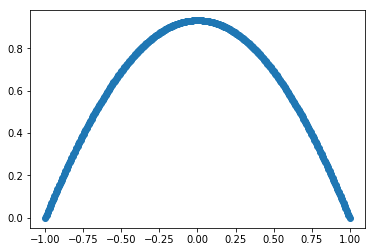

In [15]:
for i in n:
    (pred_x, pred_y) = solve(i, lambda x: 1, lambda x: 1)
    (post_x, post_y) = solve(i * 2, lambda x: 1, lambda x: 1)
    ex = True
    for j in range(len(pred_x)):
        if ((abs(pred_x[j] - post_x[j * 2]) > 0.001) or (abs(pred_y[j] - post_y[j * 2]) > 0.001)):
            print("Для n = " + str(i) + " , точность не достигается")
            ex = False
            break
    if ex:
        plt.plot(pred_x, pred_y, marker='o')
        plt.show()

### Задание 2.
Решить уравнение $$a*y" + (1 + b*x^2)*y = -1 $$ 
Т.е. *alfa = sin(k)* и *betta = cos(k)*, где k - номер варианта.

Вызовем нашу универсальную функцию:

Для n = 5 , точность не достигается
Для n = 10 , точность не достигается


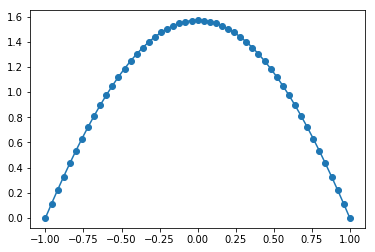

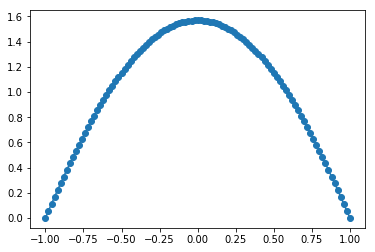

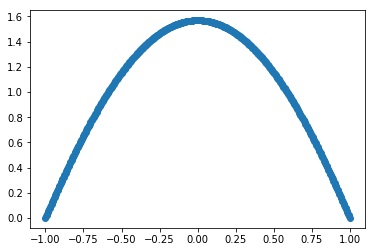

In [16]:
for i in n:
    (pred_x, pred_y) = solve(i, lambda x: np.sin(k), lambda x: np.cos(k))
    (post_x, post_y) = solve(i*2, lambda x:np.sin(k), lambda x: np.cos(k))
    ex = True
    for j in range(len(pred_x)):
        if ((abs(pred_x[j] - post_x[j*2]) > 0.001) or (abs(pred_y[j] - post_y[j*2]) > 0.001)):
            print("Для n = " + str(i) + " , точность не достигается")
            ex = False
            break
    if ex:
        plt.plot(pred_x, pred_y, marker='o')
        plt.show()

### Задание 3.
Решить уравнение $$a*y" + (1 + b*x^2)*y = -1 $$ 
Т.е. *alfa = sin(k*x)* и *betta = cos(k*x)*, где k - номер варианта.

Вызовем нашу универсальную функцию:

Для n = 5 , точность не достигается
Для n = 10 , точность не достигается


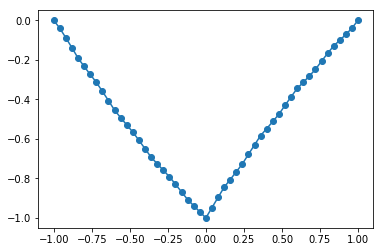

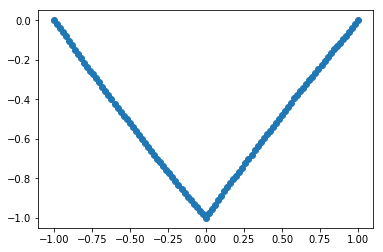

Для n = 500 , точность не достигается


In [17]:
for i in n:
    (pred_x, pred_y) = solve(i, lambda x: np.sin(k*x), lambda x: np.cos(k*x))
    (post_x, post_y) = solve(i * 2, lambda x: np.sin(k*x), lambda x: np.cos(k*x))
    ex = True
    for j in range(len(pred_x)):
        if ((abs(pred_x[j] - post_x[j * 2]) > 0.1) or (abs(pred_y[j] - post_y[j * 2]) > 0.1)):
            print("Для n = " + str(i) + " , точность не достигается")
            ex = False
            break
    if ex:
        plt.plot(pred_x, pred_y, marker='o')
        plt.show()